Data source: Kaggle
https://www.kaggle.com/c/titanic/overview

In [87]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [35]:
# Read data
# Ignore test.csv because it does not have labels for the target prediction 
# (dead/alive)
data = pd.read_csv('../raw_data/train.csv')

## Explore data

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
c = data['Survived'].isnull().any().sum()
print(f'There are {c} null values')
data['Survived'].value_counts()

There are 0 null values


0    549
1    342
Name: Survived, dtype: int64

In [39]:
c = data['Pclass'].isnull().any().sum()
print(f'There are {c} null values')
data['Pclass'].value_counts()

There are 0 null values


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
c = data['Sex'].isnull().any().sum()
print(f'There are {c} null values')

There are 0 null values


In [41]:
c = data['Age'].isnull().any().sum()
print(f'There are {c} null values')

There are 1 null values


In [42]:
c = data['Embarked'].isnull().any().sum()
print(f'There are {c} null values')
data['Embarked'].value_counts()

There are 1 null values


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
c = data['Ticket'].isnull().any().sum()
print(f'There are {c} null values')
data['Ticket'].value_counts()

There are 0 null values


CA. 2343     7
347082       7
1601         7
347088       6
3101295      6
            ..
13568        1
349247       1
349212       1
29011        1
A/5. 2151    1
Name: Ticket, Length: 681, dtype: int64

In [44]:
c = data['SibSp'].isnull().any().sum()
print(f'There are {c} null values')
data['SibSp'].value_counts()

There are 0 null values


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [45]:
c = data['Parch'].isnull().any().sum()
print(f'There are {c} null values')
data['Parch'].value_counts()

There are 0 null values


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
c = data['Fare'].isnull().any().sum()
print(f'There are {c} null values')
data['Fare'].value_counts()

There are 0 null values


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

## Preprocess data part 1: encode categorical features with dummy variables


In [47]:
y_target = data['Survived'].values # What we want to predict
data = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [48]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [49]:
data = pd.get_dummies(data) # This ignores NAs
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


## Split data into train and test

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data, y_target, test_size = .25, random_state = 1)

In [67]:
x_train = x_train.copy()
x_test = x_test.copy()

In [68]:
x_train.head

<bound method NDFrame.head of      Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
35        1  42.0      1      0  52.0000           0         1           0   
46        3  29.0      1      0  15.5000           0         1           0   
453       1  49.0      1      0  89.1042           0         1           1   
291       1  19.0      1      0  91.0792           1         0           1   
748       1  19.0      1      0  53.1000           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
715       3  19.0      0      0   7.6500           0         1           0   
767       3  30.5      0      0   7.7500           1         0           0   
72        2  21.0      0      0  73.5000           0         1           0   
235       3  29.0      0      0   7.5500           1         0           0   
37        3  21.0      0      0   8.0500           0         1           0   

     Embarked_Q  Embarked_S  
35 

## Preprocess data part 2: Fill NAs by separate to avoid data leakage

Fill NAs in age with the passengers' median age

In [69]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].median())

Now let's keep only the numerical vectors, not a data.frame

In [72]:
x_train = x_train.values
x_test = x_test.values

## Define the model

In [73]:
model = tree.DecisionTreeClassifier().fit(x_train, y_train)

## Evaluate model

Check accuracy

In [77]:
model_accuracy = round(model.score(x_test, y_test), 4)
print('Mean accuracy: %0.4f' % (model_accuracy))

Mean accuracy: 0.7578


Check ROC AUC score

In [98]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
model_roc_auc_score = roc_auc_score(y_test, y_prob)
print('ROC AUC score: %0.4f' % (model_roc_auc_score))

ROC AUC score: 0.7462


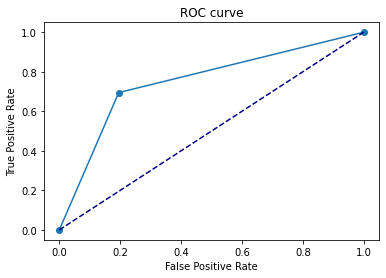

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()